# Mobile App's Revenue Analysis

In this project we will be acting as a Data Analyst that conducts a research for the Mobile App Development company.

Let's imagine that our company develops FREE mobile applications, and our main source of revenue would consist only of **in-app ads**. This would mean, that <mark style="background-color: #FFFF00">the more our users see and engage with our ads, the more money we make.</mark> 

Our goal for this project will be to analyze the data to help our developers understand **what type of apps attract more users**. Let's start!

---

## *Initial Resources & Documentation*

In just 2018, the amount of App Store and Google Play downloads has exceeded **2 millions** each. Analyzing this much data will require more time and resources than we can afford, so instead we'll use the following ***Sample Data*** from Kaggle:

- A [dataset](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv) containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. 
    - More detailed description of the dataset can be seen [here](https://www.kaggle.com/datasets/lava18/google-play-store-apps).
    
    
- A [dataset](https://dq-content.s3.amazonaws.com/350/AppleStore.csv) containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. 
    - More detailed description of the dataset can be seen [here](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps).

---

## *Unpacking Data*

Let's start by opening and reading the datasets.

The ***App Store Dataset*** will be represented as a variable named `ios`, and our ***Google Play Dataset*** will be called `android`.

For our convenience, we will remove the **Headers** from both of our sets, and keep them as separate variables instead. This gives us two advantages:
1. Our first row of the set will match with the first app entry.
2. We can now call for the Headers variables, without slicing the original dataset over and over again.

In [1]:
from csv import reader

### The Google Play data set ###
data_path = 'googleplaystore.csv'
opened_file = open(data_path, encoding='utf8')
read_file = reader(opened_file)
android_full_list = list(read_file)
android_header = android_full_list[0]
android = android_full_list[1:]

### The App Store data set ###
data_path = 'AppleStore.csv'
opened_file = open(data_path, encoding='utf8')
read_file = reader(opened_file)
ios_full_list = list(read_file)
ios_header = ios_full_list[0]
ios = ios_full_list[1:]

### Dataset Headers

Let's test out **Headers**.

In [2]:
print('iOS Header is: \n' + str(ios_header))
print('\n')
print('Android Header is: \n' + str(android_header))

iOS Header is: 
['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


Android Header is: 
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


Great! Now whenever we need to remind ourselves the exact order of our columns, we can call for respective Headers in our Python code. These headers are mostly self-explanatory, though we can always refer to the [documentation](#Initial-Resources-&-Documentation) to see the exact definition of each column.

Because we need to analyze app's prices, names, genres and possible the number of downloads, the most important columns for the Analysis stage would likely be: 

- `iOS`: 'track_name', 'price', 'prime-genre', 'rating_count_tot'
- `android`: 'App', 'Price', 'Category', 'Genre', 'Install'

### Dataset Values

The `explore_data` function below will help us explore our sets, without clustering our code with repetitve commands.

This function gives us another advantage: we can now choose the ***exact range*** of data we would like to explore. For that we will need to specify the index of first and last rows of our desired range.

In [3]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

Let's test this function by printing the first 3 rows from App Store Dataset.

In [4]:
explore_data(ios, 0, 3) 

# first index ("0") is included, 
# second index ("3") is excluded.

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']




Now we'll do the same for Goggle Play dataset, but this time, we'll set the **fourth parameter** (`rows_and_columns`) as `True`. By doing this, we'll have a quick glimpse at how many Rows and Columns our entire dataset consists of.

In [5]:
explore_data(android, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


Excellent! The function works as expected.

### Number of Apps in each Dataset

In [6]:
num_of_ios_apps = len(ios)
num_of_android_apps = len(android)

print('Number of iOS apps in the Dataset: ' + str(num_of_ios_apps))
print('Number of Android apps in the Dataset: ' + str(num_of_android_apps))

Number of iOS apps in the Dataset: 7197
Number of Android apps in the Dataset: 10841


Initial observation tells us that there are 7,197 and 10,841 rows in our `ios` and `android` sets, respectively. However, not all of those rows are appropriate for our analysis.

---

## *Data Cleaning*

Before proceeding further, we need to make sure our data is fully ready for the Analysis stage. Meaning, we need to get rid of the values that might prevent us from drawing logical conclusions. This process is called ***Data Cleaning***.

If the Data is not cleaned properly at this stage, our further analysis will be based on wrong values and draw false conclusions, which will be harmful to the project results. Hence, we need to spend some more time now, to make sure our data is rid of most (if not all) of invalid values.

For our project, this can be achieved by completing the following steps:

1. Removing or adjusting **Incorrect Data**.
2. Removing **Duplicate Data**.
3. Removing **Undesirable Data**.

### Removing / Adjusting Incorrect Data

From the [discussion forum](https://www.kaggle.com/lava18/google-play-store-apps/discussion) dedicated to our Google Play Dataset, we can see that [one of the users](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) discovered a wrongly formatted entry in our set. More specifically, the entry __#10472__ is missing a value for a __Category__ Column. This can cause us some trouble during Analysis stage, if we don't fix it as soon as possible.

We can't fill in the missing value, since we don't have access to the original information from 2018. So, the best way to fix this error without risking the rest of the data, would be to **remove the entry** altogether.

***Before Deletion:***

In [7]:
print(android[10472])

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


Deleting the entry: <sup id="head1">[1](#foot1)</sup>.

In [8]:
del android[10472]

***After Deletion:***

In [9]:
print(android[10472])

['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']


<sup id="foot1">[1](#head1)</sup> **IMPORTANT**: We should run this command only ONCE, to avoid accidentally removing correct entries.

### Removing Duplicate Data

After a quick search through the abovementioned [discussion forum](https://www.kaggle.com/lava18/google-play-store-apps/discussion), we notice that the Google Play dataset, apart from incorrect values, has a number of duplicate entries as well. For a quick example of how duplicate entries are displayed in our set, let's look at several rows for the app called `Instagram`:

In [10]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


As we can see, there can be ***more than one*** duplicate of a single app. And after looping through `android`, we can derive that it has precisely **1,181** duplicate values. Some of them are listed below.

In [11]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('Number of duplicate apps: ', len(duplicate_apps))
print('\n')
print('Example of duplicate apps: ', duplicate_apps[:15])

Number of duplicate apps:  1181


Example of duplicate apps:  ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


So how do we choose which duplicate values should be removed, and which ones should stay? What *criteria* should we use?

As we saw earlier with `Instagram`, the two duplicate rows sharing the same App Names, had matching values in all columns EXCEPT the **Reviews** Column. The values in this column tell us how many user reviews the application had, when the data was scraped.

Since the number of reviews grows over time, the latest version of the app will likely have more reviews, than the earlier versions. So, it makes sense to keep the entry that has the **largest amount of reviews**, as that entry would be the most recent.

Now that we settled on our *criteria*, let's create a ***Dictionary*** (`reviews_max`). Here we will store the Names of all applications along with their respective Maximum of reviews. 

Let's loop through our `android` set, and look at each App's data. 
- If the App is **NOT** in Dictionary, we add it there.
- If the App is already in Dictionary, AND has less reviews than our current row, we update the Dictionary value.

In [12]:
reviews_max = {}

for row in android:
    name = row[0]
    n_reviews = float(row[3])
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
        
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

The `reviews_max` Dictionary should now only consist of Unique App Names. Which means its length should be 1,181 less than the original dataset. 

`Original Length - (# of Duplicates) = Expected Length`

`10,841 - 1,181 = 9,659`

So, there should be 9,659 unique values in our Dictionary. And as we can see below, the Expected length matches the Actual one.

In [13]:
print("Expected length:", len(android)-len(duplicate_apps))
print("Actual length:", len(reviews_max))

Expected length: 9659
Actual length: 9659


With that, we can now create a new ***Dataset*** (`android_clean`), that stores only Unique App Data, without any duplicates.

To do that, we'll loop through our `android` again.

- The app information is added to `android_clean` list, and the app Name is added to `already_added` list, ONLY IF:
    - Number of its  Reviews matches with the Maximum value from `reviews_max`, and
    - App's Name is not in `already_added` list. (The reason why we need this supplementary condition is that some entries with matching app Names may have matching amounts of reviews too. We must avoid adding those duplicates to our new Dataset.)

In [14]:
android_clean = []
already_added = []

for row in android:
    name = row[0]
    n_reviews = float(row[3])
    
    if (n_reviews == reviews_max[name]) and (name not in already_added):
        android_clean.append(row)
        already_added.append(name)
        
print("Original Dataset's length:", len(android))
print("New Dataset's length:", len(android_clean))

Original Dataset's length: 10840
New Dataset's length: 9659


Amazing! We have sucessfully removed all Duplicate rows from our `android` Dataset. 

Let's see if `ios` has any duplicates:

In [15]:
duplicate_apps = []
unique_apps = []

for app in ios:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('Number of duplicate apps: ', len(duplicate_apps))
print('Example of duplicate apps: ', duplicate_apps[:15])

Number of duplicate apps:  0
Example of duplicate apps:  []


Apparently, there are no repetitive apps in `ios` set. That makes it a bit easier for us, however our Data Cleaning stage is not over yet.

### Removing Undesirable Data

Since we are designing *Free* applications that are targetted for *English-speaking* audience, the **undesirable data** in our case would be any apps that:
- contain non-English letters in their names,
- have the price of anything but `FREE`

##### Removing non-English apps

How do we isolate the app's with non-English letters in their names?

To answer this question, we need to remember that each character in our String has a corresponding number associated with it (according to **ASCII** Table). For instance, the corresponding number for character `a` is 97, character `A` is 65, and character `爱` is 29,233. 

The characters that are primarily used in English, including digits from `0` to `9`, punctuation marks `(., !, ?, ;)`, and other symbols `(+, *, /)`, are located between numbers 0 and 127 in the ASCII Table. So we will assume that our apps' names should only consist of characters from that specific range.

For that we will build a function, called `is_language_english` that returns `False`, if the String has at least one character ouside of that range.

In [16]:
def is_language_english(word):
    for letter in word:
        if ord(letter) > 127:
            return False
    return True

Let's test it on various Strings to make sure it works as desired:

In [17]:
print(is_language_english('Instagram')) # Should return 'True'
print(is_language_english('爱奇艺PPS -《欢乐颂2》电视剧热播')) # Should return 'False'
print(is_language_english('Docs To Go™ Free Office Suite')) # Should return 'True'
print(is_language_english('Instachat 😜')) # Should return 'True'

True
False
False
False


Something feels off. There seems to be an issue.

The Strings "`Docs To Go™ Free Office Suite`" and "`Instachat 😜`" consist of mostly English letters, yet they returned `False`. That is because the Emoji and Trademark symbols fall outside of our given range.

In [18]:
print(ord('™'))
print(ord('😜'))

8482
128540


Technically, we could add specific exceptions to the IF condition, but it would take too much space and time to fill out all possible exceptions to our function. So, instead we'll choose a simpler route for our project. Let's add the condition that states the following:

- If the String happens to have one, two or three values outside of the range, we'll let it fly and return `True`.
- But if it has more than three values outside the range, then it should return `False`.

In [19]:
def is_language_english(word):
    non_english_letters = 0
    
    for letter in word:
        if ord(letter) > 127:
            non_english_letters += 1
            
        if non_english_letters > 3:
            return False
    return True

In [20]:
print(is_language_english('Instagram')) # Should return 'True'
print(is_language_english('爱奇艺PPS -《欢乐颂2》电视剧热播')) # Should return 'False'
print(is_language_english('Docs To Go™ Free Office Suite')) # Should return 'True'
print(is_language_english('Instachat 😜')) # Should return 'True'

True
False
True
True


Now the function has a more desirable output. Of course, it's not a perfect solution, as some non-English apps may still slip through cracks (and certain English apps might be omitted). But it's good enough for our analysis.

It's time to apply the function to our dataset.

In [21]:
ios_english_apps = []
android_english_apps = []

for row in ios:
    name = row[1] # Remember, that iOS set has names stored in 2nd Column
    if is_language_english(name):
        ios_english_apps.append(row)
        
for row in android_clean:
    name = row[0]
    if is_language_english(name):
        android_english_apps.append(row)
        
        
print('Number of ALL iOS Apps: ', len(ios))
print('Number of ENGLISH iOS Apps: ', len(ios_english_apps))

print('\n')
print('Number of ALL Android Apps: ', len(android_clean))
print('Number of ENGLISH Android Apps: ', len(android_english_apps))

Number of ALL iOS Apps:  7197
Number of ENGLISH iOS Apps:  6183


Number of ALL Android Apps:  9659
Number of ENGLISH Android Apps:  9614


Perfect! We have isolated values of our dataset, according to the *first criteria*. Now it's time for the *second one*.

##### Removing non-Free apps

To isolate free apps from paid ones, we need to remind ourselves which columns in each dataset represent prices. 

For `ios` it's the **'price'** Column with index `[4]`, and for `android` it would be **'Price'** Column with index `[7]`. All we have to do know is to create a new Dataset and fill it with rows that have the prices valued at zero. 

Now let's quickly look at how prices in each dataset are represented:

In [22]:
explore_data(ios,0,1)
explore_data(android,0,1)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']




We see that `ios` price is a String of a number with one decimal place ('`0.0`'), and `android` price is a String with no decimal places ('`0`').

With that knowledge, let's isolate the values accordingly:

In [23]:
ios_free_english_apps = []
android_free_english_apps = []

for row in ios_english_apps:
    price = row[4]
    if price == '0.0':
        ios_free_english_apps.append(row)
    
for row in android_english_apps:
    price = row[7]
    if price == '0':
        android_free_english_apps.append(row)
        
print('Number of ALL iOS Apps: ', len(ios))
print('Number of ENGLISH iOS Apps: ', len(ios_english_apps))
print('Number of FREE, ENGLISH iOS Apps: ', len(ios_free_english_apps))

print('\n')
print('Number of ALL Android Apps: ', len(android))
print('Number of ENGLISH Android Apps: ', len(android_english_apps))
print('Number of FREE, ENGLISH Android Apps: ', len(android_free_english_apps))

Number of ALL iOS Apps:  7197
Number of ENGLISH iOS Apps:  6183
Number of FREE, ENGLISH iOS Apps:  3222


Number of ALL Android Apps:  10840
Number of ENGLISH Android Apps:  9614
Number of FREE, ENGLISH Android Apps:  8864


Finally, we have cleaned our data, to display only the desirable values. There are 3,222 iOS and 8,864 Android applications that are Free and made for English-speaking users.

We can now move on to the next stage.

---

## *Data Analysis*

### Part One (Genres & Categories)

Our goal is to determine the kinds of apps that are likely to attract more users. To minimize risks and overhead, our validation strategy for an app idea has three steps:

- Build a minimal Android version of the app, and add it to Google Play.
- If the app has a good response from users, we develop it further.
- If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful in both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by determining the most common ***genres*** for each market. For this, we'll need to build frequency tables for a few columns in our datasets.

In [24]:
def freq_table(dataset, index):
    table = {}                    # Create Dictionary
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        
        if value in table:        # If value exists, add 1 in Dict
            table[value] += 1
        else:                     # Else, create value in Dict
            table[value] = 1
            
    table_percentages = {}
    
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = round(percentage, 2)
    
    return table_percentages

The `freq_table` function above lets us calculate the frequency of each value in a selected column and display it as percentages. Although this function is good for displaying percentages, it's not very good in sorting them. That's because our numerical values are stored as Dictionary Values and not as Keys.

To sort them, we will need to put values in a list of pairs (tuples) with numerical values as the first elements.

In [25]:
def display_table(dataset, index):
    table = freq_table(dataset, index)   # Use freq_table()
    table_display = []                   # Create List
    
    for key in table:
        key_val_as_tuple = (table[key], key)     # For each key in Dict, create an inversed Tuple
        table_display.append(key_val_as_tuple)   # Add Tuple to List
        
    table_sorted = sorted(table_display, reverse = True)    # Sort List in Desc. order
    
    for entry in table_sorted:
        print(entry[1], ':', entry[0])           # Print all Tuples in list

The `display_table` function needs a result `freq_table` to restructure frequency table in a more accessible format. This function actually allows us to sort the values in a descending order, to make our data easier to read and analyze.

Now that both functions are ready, we can test them out on several columns.

First, let's test them on **prime-genre** column in `ios`.

In [26]:
display_table(ios_free_english_apps, 11)

Games : 58.16
Entertainment : 7.88
Photo & Video : 4.97
Education : 3.66
Social Networking : 3.29
Shopping : 2.61
Utilities : 2.51
Sports : 2.14
Music : 2.05
Health & Fitness : 2.02
Productivity : 1.74
Lifestyle : 1.58
News : 1.33
Travel : 1.24
Finance : 1.12
Weather : 0.87
Food & Drink : 0.81
Reference : 0.56
Business : 0.53
Book : 0.43
Navigation : 0.19
Medical : 0.19
Catalogs : 0.12


Based on the obtained output, we can derive following conclusions for iOS games:
- `Games` is the most popular genre. 
- There are more games in App Store, than all other apps combined (58.16%).
- Second most popular genre is `Entertainment`.
- Apps that have entertainment value (`Games, Entertainment, Photo & Video`) are more prominent than those meant for practical purposes (`Education, Utilities, etc.`).

It is important not to confuse correlation with causality. While we can see that there are radically more Games in App Store, it doesn’t necessarily prove that most of the users prefer this genre. We also cannot tell how much time users actually spend on Games, and if it’s significantly longer compared to other apps. It is heavily implied, but not proven yet.

Let’s take a look at a **Category** Column for `android`.

In [27]:
display_table(android_free_english_apps, 1)

FAMILY : 18.91
GAME : 9.72
TOOLS : 8.46
BUSINESS : 4.59
LIFESTYLE : 3.9
PRODUCTIVITY : 3.89
FINANCE : 3.7
MEDICAL : 3.53
SPORTS : 3.4
PERSONALIZATION : 3.32
COMMUNICATION : 3.24
HEALTH_AND_FITNESS : 3.08
PHOTOGRAPHY : 2.94
NEWS_AND_MAGAZINES : 2.8
SOCIAL : 2.66
TRAVEL_AND_LOCAL : 2.34
SHOPPING : 2.25
BOOKS_AND_REFERENCE : 2.14
DATING : 1.86
VIDEO_PLAYERS : 1.79
MAPS_AND_NAVIGATION : 1.4
FOOD_AND_DRINK : 1.24
EDUCATION : 1.16
ENTERTAINMENT : 0.96
LIBRARIES_AND_DEMO : 0.94
AUTO_AND_VEHICLES : 0.93
HOUSE_AND_HOME : 0.82
WEATHER : 0.8
EVENTS : 0.71
PARENTING : 0.65
ART_AND_DESIGN : 0.64
COMICS : 0.62
BEAUTY : 0.6


Here are some conclusions we can withdraw for Android:
- `Family` apps is the most popular category in Google Play (18.91%).
- `Game` is the second most popular category (9.72%). Only half of `Family`'s percentage.
- While `Family` genre is noticeably higher in numbers, other games are more or less evenly spread out across the rest of the categories.


This already gives us an interesting comparison, but let's also take a look at **Genres** Column:

In [28]:
display_table(android_free_english_apps, 9)

Tools : 8.45
Entertainment : 6.07
Education : 5.35
Business : 4.59
Productivity : 3.89
Lifestyle : 3.89
Finance : 3.7
Medical : 3.53
Sports : 3.46
Personalization : 3.32
Communication : 3.24
Action : 3.1
Health & Fitness : 3.08
Photography : 2.94
News & Magazines : 2.8
Social : 2.66
Travel & Local : 2.32
Shopping : 2.25
Books & Reference : 2.14
Simulation : 2.04
Dating : 1.86
Arcade : 1.85
Video Players & Editors : 1.77
Casual : 1.76
Maps & Navigation : 1.4
Food & Drink : 1.24
Puzzle : 1.13
Racing : 0.99
Role Playing : 0.94
Libraries & Demo : 0.94
Auto & Vehicles : 0.93
Strategy : 0.91
House & Home : 0.82
Weather : 0.8
Events : 0.71
Adventure : 0.68
Comics : 0.61
Beauty : 0.6
Art & Design : 0.6
Parenting : 0.5
Card : 0.45
Casino : 0.43
Trivia : 0.42
Educational;Education : 0.39
Board : 0.38
Educational : 0.37
Education;Education : 0.34
Word : 0.26
Casual;Pretend Play : 0.24
Music : 0.2
Racing;Action & Adventure : 0.17
Puzzle;Brain Games : 0.17
Entertainment;Music & Video : 0.17
Casual;

What do we see here?:

- `Tools` is the most popular genre in Google Play.
- `Entertainment` is the second most popular genre.
- Practical apps are generally more popular than Leisure apps.
- **Genres** are more specific than **Categories**. One app may have more than one genre.


So, what does all of this mean?

Well, this analysis shows us an interesting distinction between the two platforms:

1. ***App Store*** is mostly populated with **Gaming apps**, while Google Play has a mix of fun and practical applications.
2. Further in-depth analysis tells us that ***Google Play*** has an incline toward both **Family Entertainment** and apps categorized as **Tools**.
3. App Store doesn’t have a genre labeled Tools, so it becomes harder to find its equivalent for iOS.

| App Store | Google Play Store |
| :-: | :-: |
| mostly populated with ***Gaming*** apps | mostly populated with ***Family*** apps |
| focus on ***Entertainment***  | focus on both ***Entertainment*** and ***Tools*** |
| DOESN'T have ***Tools*** genre  | has ***Tools*** genre    |

Since iOS doesn't have a specific equivalent of "Tools" genre, we should not focus on it too much. But what about `Family` apps? Do they differ from iOS Games?

It's interesting that if we go to [Google Play website](https://play.google.com/store/apps/category/FAMILY?age=AGE_RANGE3&hl=en_US&gl=US) and look for `Family` category, we will mostly discover Games for Kids.

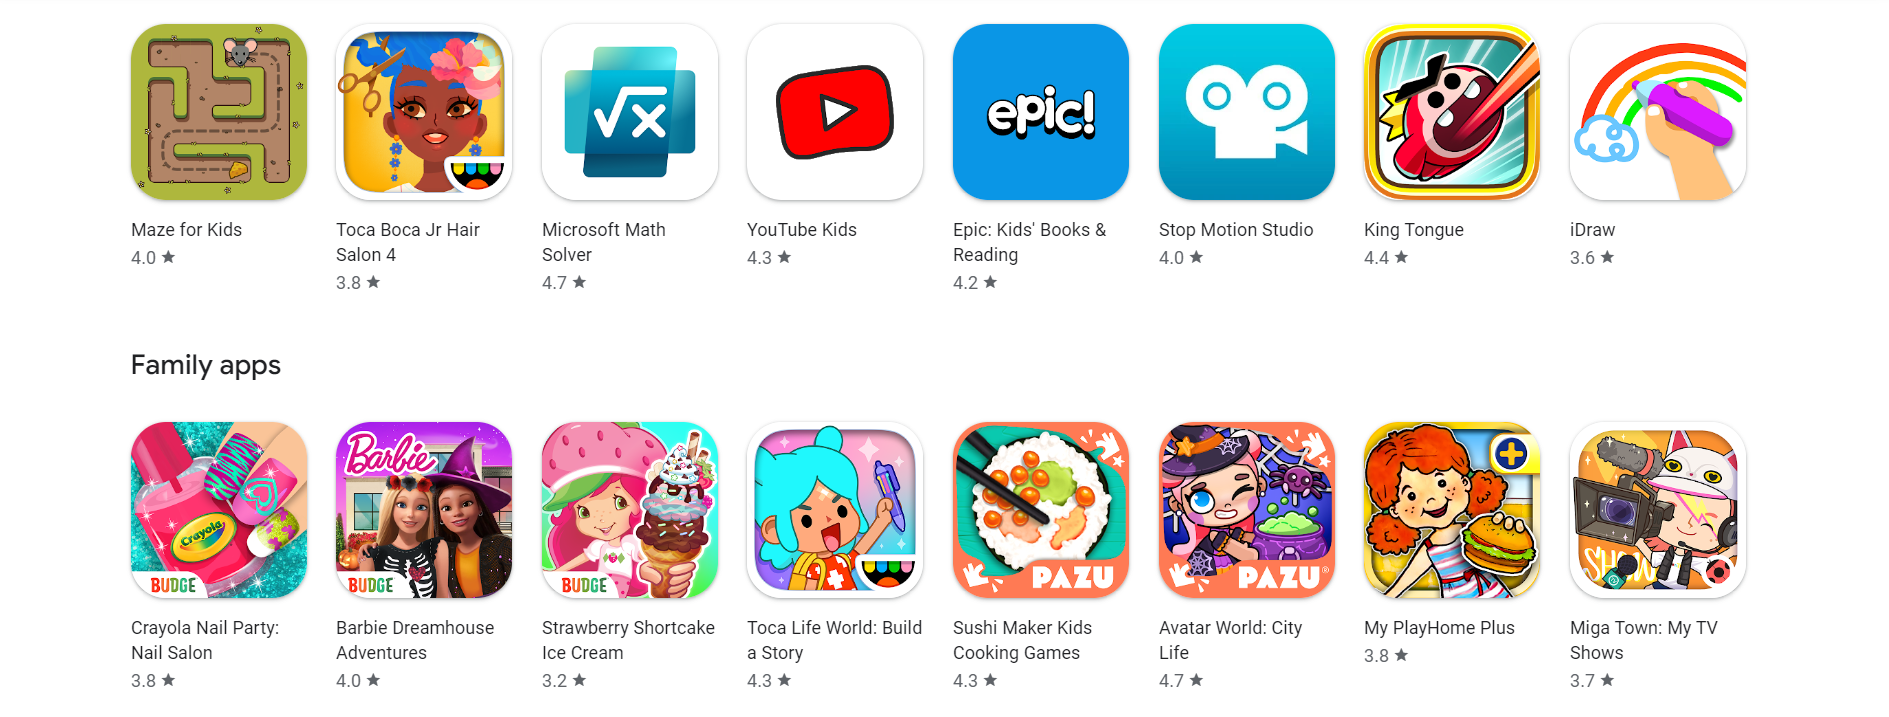

So, now we know, that of we want to get attention of as many users as possible, ***Games*** and ***Entertainment*** applications are our safest bet.

These results are promising, but we still don't know which apps have the most users. We should continue our analysis.

### Part Two (Installs & Ratings)

To determine which apps have the most users, we can calculate the average number of installs for each app genre. With Google Play it's easy, as it has an **Installs** Column. But App Store doesn't have a column showing the number of downloads per app. So, for iOS apps we'll take the number of user ratings per app instead. It would be our proxy.

We'll use the `ios` **Genres** frequency table, that we created with `freq_table` earlier. It will be needed browse through each unique genre and to combine **Reviews** for each one of them. After all instances of a particular genre are found, we calculate the average amount of user ratings.

In [29]:
ios_genres_frequency = freq_table(ios_free_english_apps, 11)
print("Average number of Ratings for each iOS App Genre:\n")

for genre in ios_genres_frequency:  # Loop through unique genres
    total = 0
    len_genre = 0
    
    for row in ios_free_english_apps:        # Nested loop through apps
        genre_app = row[11]
        
        if genre_app == genre:               # If genres match,
            user_ratings = float(row[5])     # add ratings to total and increment length
            total += user_ratings
            len_genre += 1
    
    average_rating = round(total / len_genre, 2)   # Once all instances of genre are found,
    print(genre, ':', average_rating)              # calculate and print overall average rating

Average number of Ratings for each iOS App Genre:

Social Networking : 71548.35
Photo & Video : 28441.54
Games : 22788.67
Music : 57326.53
Reference : 74942.11
Health & Fitness : 23298.02
Weather : 52279.89
Utilities : 18684.46
Travel : 28243.8
Shopping : 26919.69
News : 21248.02
Navigation : 86090.33
Lifestyle : 16485.76
Entertainment : 14029.83
Food & Drink : 33333.92
Sports : 23008.9
Book : 39758.5
Finance : 31467.94
Education : 7003.98
Productivity : 21028.41
Business : 7491.12
Catalogs : 4004.0
Medical : 612.0


`Navigation` Category seemingly has the most amount of ratings, but let's try to find what those applications are:

In [30]:
for app in ios_free_english_apps:
    if app[11] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


As we see, the large portion of `NAVIGATION` is made up of the most popular exisiting Map Services (Waze, Google Maps, etc.). It may be a bad idea to assume that our potential Map App would gain the same amount of users.

But now let's look at the values from `android`'s **Installs** Column:

In [31]:
print("Ratio of Installs for each Android App:\n")
display_table(android_free_english_apps, 5) #The Installs column

Ratio of Installs for each Android App:

1,000,000+ : 15.73
100,000+ : 11.55
10,000,000+ : 10.55
10,000+ : 10.2
1,000+ : 8.39
100+ : 6.92
5,000,000+ : 6.83
500,000+ : 5.56
50,000+ : 4.77
5,000+ : 4.51
10+ : 3.54
500+ : 3.25
50,000,000+ : 2.3
100,000,000+ : 2.13
50+ : 1.92
5+ : 0.79
1+ : 0.51
500,000,000+ : 0.27
1,000,000,000+ : 0.23
0+ : 0.05
0 : 0.01


It's worth pointing out that this table doesn't show precise number of downloads; only the starting point. For instance, `500,000+` may include 600k, 700k, etc. But we don't need precise values, as long as we can find relatively popular app categories.

Using similar methods as before, we can get the table of unique categories and use them to group and calculate the average of Reviews.

In [32]:
table_display = []
android_categories_freq = freq_table(android_free_english_apps, 1)

for category in android_categories_freq:    # Loop through Categories
    total = 0
    len_category = 0
    
    for row in android_free_english_apps:       # Loop through Apps
        category_app = row[1]
        
        if category_app == category:                     # If Category matched,
            install_num = row[5]                         # Format and Add reviews to total
            install_num = install_num.replace('+','')
            install_num = install_num.replace(',','')
            total += float(install_num)
            len_category += 1

    average_installs = round(total / len_category, 2)    # Calculate Average of reviews
#     print(category, ':', average_installs)


    review_genre_tuple = (average_installs, category)
    table_display.append(review_genre_tuple)

table_sorted = sorted(table_display, reverse = True) 

print("Top 10 Downloaded Android Apps:\n")
for entry in table_sorted[:10]:
    print(entry[1], ':', entry[0])

Top 10 Downloaded Android Apps:

COMMUNICATION : 38456119.17
VIDEO_PLAYERS : 24727872.45
SOCIAL : 23253652.13
PHOTOGRAPHY : 17840110.4
PRODUCTIVITY : 16787331.34
GAME : 15588015.6
TRAVEL_AND_LOCAL : 13984077.71
ENTERTAINMENT : 11640705.88
TOOLS : 10801391.3
NEWS_AND_MAGAZINES : 9549178.47


Based on what we see above, `COMMUNICATION` seems to be the most reviewed type of applications. So, it should be the genre that is popular on average, right?

Before jumping into conclusion, another important factor that we should consider is that based on earlier results, only a **small portion** of the apps have ***over 500 million downloads***. This implies that certain software giants (like Google and Microsoft) have released applications, that a lot of people use. But those few enormously prominent apps drastically skew the overall average of reviews.

It becomes even more apparent when calculating the number of apps that fall into this minority:

In [33]:
peak_genres = {}

for row in android_free_english_apps:
    row_rating = row[5]    
    row_name = row[0]
    
    if (row_rating == "1,000,000,000+" 
        or row_rating == "500,000,000+" 
       ):
        
        row_genre = row[1]
        if row_genre in peak_genres:
            peak_genres[row_genre] += 1
        else:
            peak_genres[row_genre] = 1

print('Popular Genres across "Giants":\n')
peak_genres

Popular Genres across "Giants":



{'BOOKS_AND_REFERENCE': 1,
 'COMMUNICATION': 11,
 'GAME': 5,
 'SOCIAL': 5,
 'PHOTOGRAPHY': 1,
 'TRAVEL_AND_LOCAL': 2,
 'TOOLS': 6,
 'PRODUCTIVITY': 5,
 'VIDEO_PLAYERS': 3,
 'NEWS_AND_MAGAZINES': 3,
 'HEALTH_AND_FITNESS': 1,
 'FAMILY': 1}

Interestingly, `COMMUNICATION` apps make up the majority of so-called "Giant" apps. What happens if we don't consider those apps' reviews, when calculating average? Let's recalculate averages for a couple of Categories of interest:

In [34]:
under_500_comm = []
under_500_tools = []
under_500_games = []

for app in android_free_english_apps:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 500000000):
        under_500_comm.append(float(n_installs))
    elif (app[1] == 'TOOLS') and (float(n_installs) < 500000000):
        under_500_tools.append(float(n_installs))
    elif (app[1] == 'GAME') and (float(n_installs) < 500000000):
        under_500_games.append(float(n_installs))
        
print("New COMMUNICATION Average:", sum(under_500_comm) / len(under_500_comm))
print("New TOOLS Average:", sum(under_500_tools) / len(under_500_tools))
print("New GAME Average:", sum(under_500_games) / len(under_500_games))

New COMMUNICATION Average: 9191689.13405797
New TOOLS Average: 6184198.2177419355
New GAME Average: 12178377.421236873


If we remove the reviews of those particular Apps from the equation, we will see that the average for `COMMUNICATION` Category drops from 38 to just 9 million. This pushes back `COMMUNICATION` to the 11th position in the "Top Downloaded" table.

Surpisingly, there were no `ENTERTAINMENT` apps among the "Giants". The `TOOLS` and `GAME` genres are almost equally in the middle (5-6 apps, compared to 11 of `COMMUNICATION` ones). And removing the Giant apps from the equation would not reduce the average by much (only by 4-5 millions).

All of this complicated math tells us this: if we are making our own apps, and are not part of leading mobile industries, we shouldn't make **Communication** Category a top priority. At the end of the day, their users will be about the same in numbers as for **Games** and **Tools** Genres.

---

## *Final Conclusion*

The goal of this project was to find a type of Mobile App, that would attract the most users for both App Store and Google Play. 

From analyzing User Reviews and Downloads, it's safe to assume that the best for finding common ground between iOS and Android users would be a Family-friendly Mobile Game. This type of game would likely get a lot of users, since App Store is mainly selling games on their platform, and Google Play is open to Family-oriented content. And since Games require more attention and time from the player, it is likely that they would see the ads more often, as long as the game is entertaining.